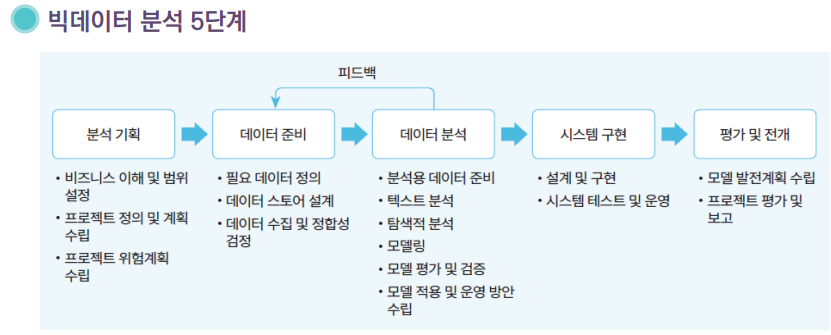
-  #### 정형 분석하세요 -> XGBOOST
- 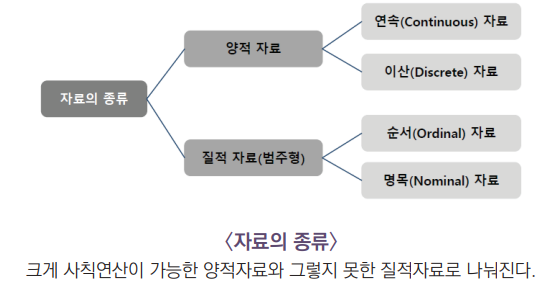
  - 양적 자료 -> 기술통계 (차트화)
  - 질적 자료 -> 빈도수(groupby)
- 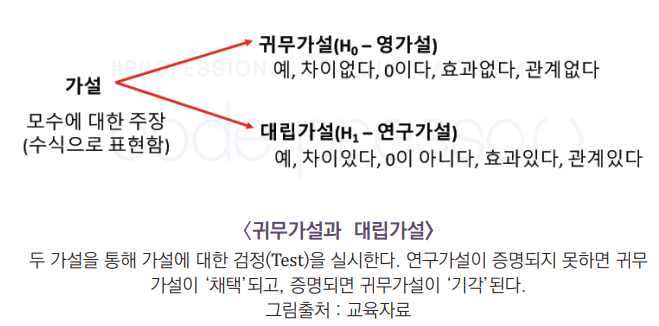
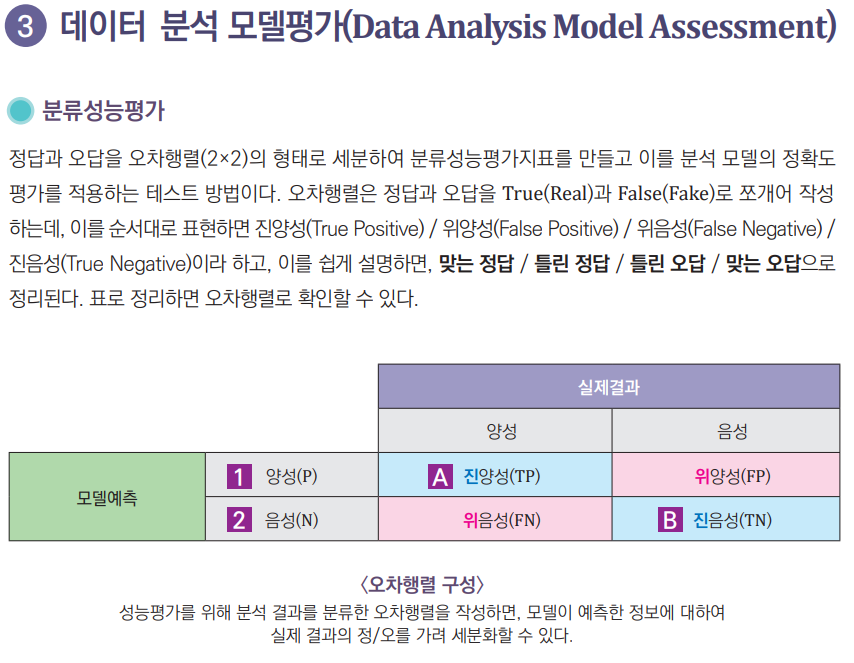
  - ### 가설검증,P-VALUE -> 빅데이터에서는 P-VALUE가 5%미만으로 무조건 나옴, 그래서 가설검증 x
  - ### 다만 정형데이터에서는 여러분석 모델을 사용해서 비교해야 하는데 이때 고전모델은 기본(이때 가설검증해야함)

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob

In [7]:
# !pip install openpyxl

In [22]:
dataList='./행복지수/*.xlsx'
file=glob(dataList)[0]
print(file.split('_')[1][:-5])
교육=pd.read_excel(file).iloc[:,1:4]
교육

건강


,시도,구군,평균
0,서울특별시,종로구,0.9220
1,서울특별시,중구,0.6742
2,서울특별시,용산구,0.5898
3,서울특별시,성동구,0.4794
4,서울특별시,광진구,0.6373
...,...,...,...
224,경상남도,함양군,0.2036
225,경상남도,거창군,0.2150
226,경상남도,합천군,0.2128
227,제주특별자치도,제주시,0.2537


In [26]:
for file in glob(dataList):
    print(file.split('_')[1].split('.')[0])

건강
경제
관계및사회참여
교육
삶의만족도
안전
여가
환경


In [27]:
cnt=0
file=glob(dataList)[cnt];cnt+1
건강=pd.read_excel(file).iloc[:,1:4]
file=glob(dataList)[cnt];cnt+1
경제=pd.read_excel(file).iloc[:,1:4]
file=glob(dataList)[cnt];cnt+1
관계및사회참여=pd.read_excel(file).iloc[:,1:4]
file=glob(dataList)[cnt];cnt+1
교육=pd.read_excel(file).iloc[:,1:4]
file=glob(dataList)[cnt];cnt+1
삶의만족도=pd.read_excel(file).iloc[:,1:4]
file=glob(dataList)[cnt];cnt+1
안전=pd.read_excel(file).iloc[:,1:4]
file=glob(dataList)[cnt];cnt+1
여가=pd.read_excel(file).iloc[:,1:4]
file=glob(dataList)[cnt];cnt+1
환경=pd.read_excel(file).iloc[:,1:4]

In [49]:
건강[(건강['시도']=='서울특별시') & (건강['구군']=='중구')]
건강[(건강['시도']=='서울특별시') & (건강['평균']>=0.5)]

,시도,구군,평균
0,서울특별시,종로구,0.9220
1,서울특별시,중구,0.6742
2,서울특별시,용산구,0.5898
4,서울특별시,광진구,0.6373
5,서울특별시,동대문구,0.6024
6,서울특별시,중랑구,0.5225
12,서울특별시,서대문구,0.8437
13,서울특별시,마포구,0.5414
14,서울특별시,양천구,0.6074
16,서울특별시,구로구,0.5995


In [55]:
건강[건강['시도'].str.contains('특별')]

,시도,구군,평균
0,서울특별시,종로구,0.9220
1,서울특별시,중구,0.6742
2,서울특별시,용산구,0.5898
3,서울특별시,성동구,0.4794
4,서울특별시,광진구,0.6373
5,서울특별시,동대문구,0.6024
6,서울특별시,중랑구,0.5225
7,서울특별시,성북구,0.4177
8,서울특별시,강북구,0.3987
9,서울특별시,도봉구,0.4683


In [56]:
#####################
## 건강자료에서 시도별 건강.csv로 저장하려고한다.
#건강_부산광역시.csv
#건강_경기.csv
#건강_서울특별시.csv
#####################


In [58]:
조건='서울특별시'
tmp=건강[건강['시도']==조건]
tmp.to_csv('./행복지수/시도별/'+ 조건 +'.csv',index=False)

In [60]:
조건리스트=건강['시도'].unique()
for 조건 in 조건리스트:
    tmp=건강[건강['시도']==조건]
    tmp.to_csv('./행복지수/시도별/건강'+ 조건 +'.csv',index=False,encoding='utf-8')
    print(조건,'save 완료')

서울특별시 save 완료
부산광역시 save 완료
대구광역시 save 완료
인천광역시 save 완료
광주광역시 save 완료
대전광역시 save 완료
울산광역시 save 완료
세종특별자치시 save 완료
경기도 save 완료
강원도 save 완료
충청북도 save 완료
충청남도 save 완료
전라북도 save 완료
전라남도 save 완료
경상북도 save 완료
경상남도 save 완료
제주특별자치도 save 완료


In [69]:
건강['시군구']=건강['시도']+'_'+건강['구군']
건강.head(3)
result=[]
for x in 건강['평균']:
    if x>0.5:
        result.append('상')
    else:
        result.append('하')
건강['비고']=result
건강.head()
# 이거를 lambda 식으로 바꿔야함
건강['시군구'] = 건강.apply(lambda row: row['시도'] + '_' + row['구군'], axis=1)
건강['비고'] = 건강['평균'].apply(lambda x: '상' if x > 0.5 else '하')
건강.head()


,시도,구군,평균,시군구,비고
0,서울특별시,종로구,0.9220,서울특별시_종로구,상
1,서울특별시,중구,0.6742,서울특별시_중구,상
2,서울특별시,용산구,0.5898,서울특별시_용산구,상
3,서울특별시,성동구,0.4794,서울특별시_성동구,하
4,서울특별시,광진구,0.6373,서울특별시_광진구,상


In [83]:
df=건강.iloc[:,:-2].copy() # 깊은 복사를 해야, 건강데이터가 변경되었을때 df 데이터가 영향 받지 않음 ,df=건강
df['비고']=0
def aaa(row):
    if row>0.5:
        return '상'
    else:
        return '하' 

for cnt,x in enumerate(df['평균']):
    df['비고'][cnt]=aaa(x)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_11192\1982040748.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['비고'][cnt]=aaa(x)
C:\Users\USER\AppData\Local\Temp\ipykernel_11192\1982040748.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '상' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['비고'][cnt]=aaa(x)


,시도,구군,평균,비고
0,서울특별시,종로구,0.9220,상
1,서울특별시,중구,0.6742,상
2,서울특별시,용산구,0.5898,상
3,서울특별시,성동구,0.4794,하
4,서울특별시,광진구,0.6373,상
...,...,...,...,...
224,경상남도,함양군,0.2036,하
225,경상남도,거창군,0.2150,하
226,경상남도,합천군,0.2128,하
227,제주특별자치도,제주시,0.2537,하


### lambda로 하는게 속도가 더 빠르다
- 리스트를 안쓰는게 파이썬에서 속도를 높이는 방법

In [88]:
import pandas as pd 
dust=pd.read_excel('dust.xlsx')
display(dust.head())
display(dust.info())
display(dust.describe())

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


None

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [89]:
dust.rename(columns={'날짜':'date','아황산가스':'so2','일산화탄소':'co','오존':'o3','이산화질소':'no2'},inplace=True)

In [90]:
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [93]:
dust['date']=dust['date'].str[:11]
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0


In [94]:
dust['date']=pd.to_datetime(dust['date'])
dust.dtypes

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [95]:
dust['year']=dust['date'].dt.year
dust['month']=dust['date'].dt.month
dust['day']=dust['date'].dt.day
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [97]:
dust=dust[['date','year', 'month','day', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5']]
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,NaN,14.0


In [98]:
dust.isnull().sum()

date      0
year      0
month     0
day       0
so2       4
co        4
o3        4
no2       4
PM10     19
PM2.5     5
dtype: int64

In [99]:
dust=dust.fillna(method='pad')

C:\Users\USER\AppData\Local\Temp\ipykernel_11192\2501578481.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust=dust.fillna(method='pad')


In [100]:
dust.fillna(20,inplace=True)
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [101]:
dust.isna().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

In [128]:
weather=pd.read_excel('weather.xlsx')
weather.head()

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [129]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


In [130]:
weather.drop('지점',axis=1,inplace=True)
weather.drop('지점명',axis=1,inplace=True)
weather.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [131]:
weather.columns=['date','temp','wind','rain','humid']
weather.info()
weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


,date,temp,wind,rain,humid
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4
...,...,...,...,...,...
738,2021-01-31 19:00:00,7.4,0.6,0.0,51.0
739,2021-01-31 20:00:00,6.5,1.0,0.0,59.4
740,2021-01-31 21:00:00,7.7,1.0,0.0,60.3
741,2021-01-31 22:00:00,6.8,0.6,0.0,63.7


In [132]:

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [134]:
weather['rain']=weather['rain'].replace([0],0.01)
weather['rain'].value_counts()

rain
0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: count, dtype: int64

In [137]:
dust.shape,weather.shape

((744, 10), (743, 5))

In [138]:
dust.drop(index=743,inplace=True)

In [139]:
df=pd.merge(dust,weather,on='date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-02,2021,1,2,0.004,0.4,0.027,0.012,19.0,16.0,-2.0,1.7,0.01,40.7
1,2021-01-02,2021,1,2,0.004,0.4,0.026,0.013,14.0,8.0,-2.0,1.7,0.01,40.7
2,2021-01-02,2021,1,2,0.004,0.4,0.023,0.017,29.0,13.0,-2.0,1.7,0.01,40.7
3,2021-01-02,2021,1,2,0.003,0.4,0.026,0.013,24.0,13.0,-2.0,1.7,0.01,40.7
4,2021-01-02,2021,1,2,0.004,0.4,0.028,0.010,18.0,9.0,-2.0,1.7,0.01,40.7


In [140]:
df.corr()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.307947,0.222592,-0.121581,0.203132,-0.015867,0.026533,0.464584,-0.101991,NaN,0.228621
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.307947,0.222592,-0.121581,0.203132,-0.015867,0.026533,0.464584,-0.101991,NaN,0.228621
so2,-0.307947,NaN,NaN,-0.307947,1.000000,0.148276,-0.072666,0.091891,0.171688,0.156264,-0.461918,0.020817,NaN,-0.183347
co,0.222592,NaN,NaN,0.222592,0.148276,1.000000,-0.756154,0.841088,0.530722,0.694054,0.237092,-0.437012,NaN,0.258817
o3,-0.121581,NaN,NaN,-0.121581,-0.072666,-0.756154,1.000000,-0.925406,-0.353075,-0.530207,-0.087188,0.404506,NaN,-0.156777
no2,0.203132,NaN,NaN,0.203132,0.091891,0.841088,-0.925406,1.000000,0.420847,0.566678,0.184235,-0.457444,NaN,0.169406
PM10,-0.015867,NaN,NaN,-0.015867,0.171688,0.530722,-0.353075,0.420847,1.000000,0.824129,0.120553,-0.239832,NaN,0.211452
PM2.5,0.026533,NaN,NaN,0.026533,0.156264,0.694054,-0.530207,0.566678,0.824129,1.000000,0.130186,-0.366732,NaN,0.295873


In [141]:
corr=df.corr()
corr
corr['PM10'].sort_values(ascending=False)

PM10     1.000000
PM2.5    0.824129
co       0.530722
no2      0.420847
humid    0.211452
so2      0.171688
temp     0.120553
day     -0.015867
date    -0.015867
wind    -0.239832
o3      -0.353075
year          NaN
month         NaN
rain          NaN
Name: PM10, dtype: float64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'o3'}>, <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humid'}>, <Axes: >, <Axes: >]],
      dtype=object)

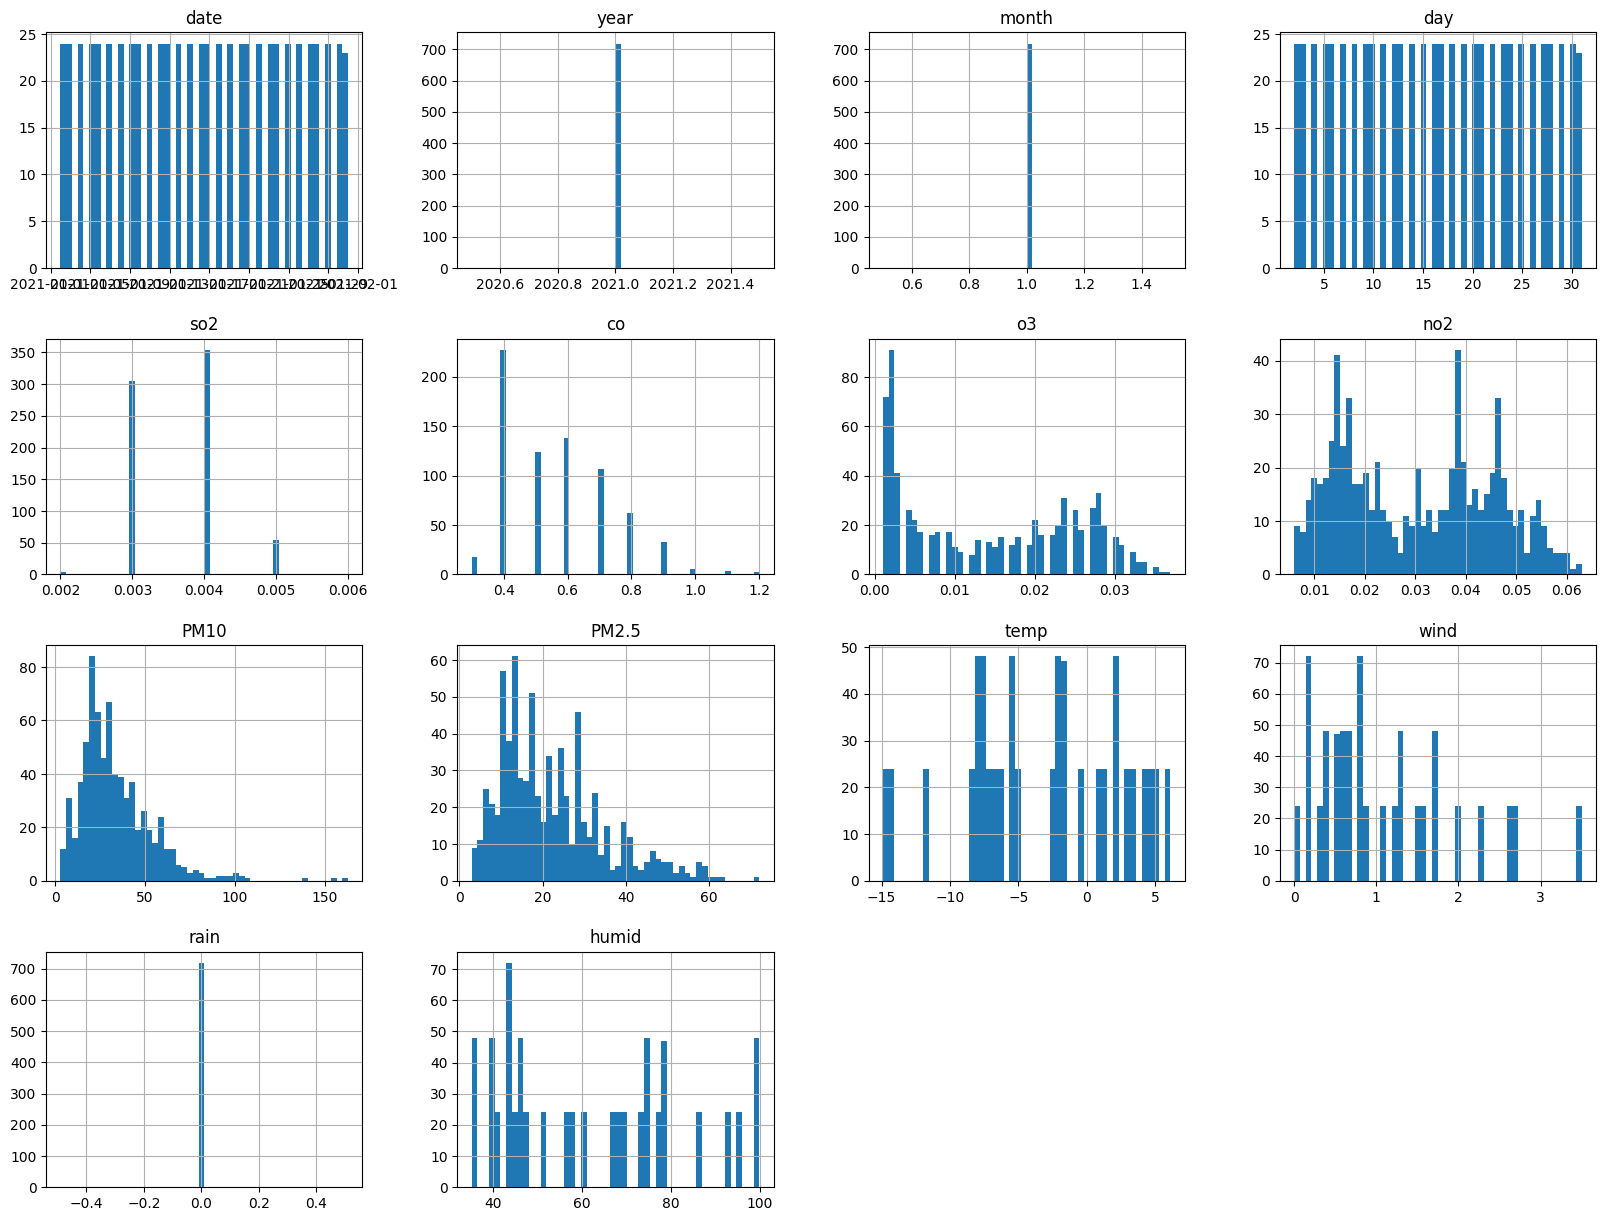

In [142]:
df.hist(bins=50,figsize=(20,15))

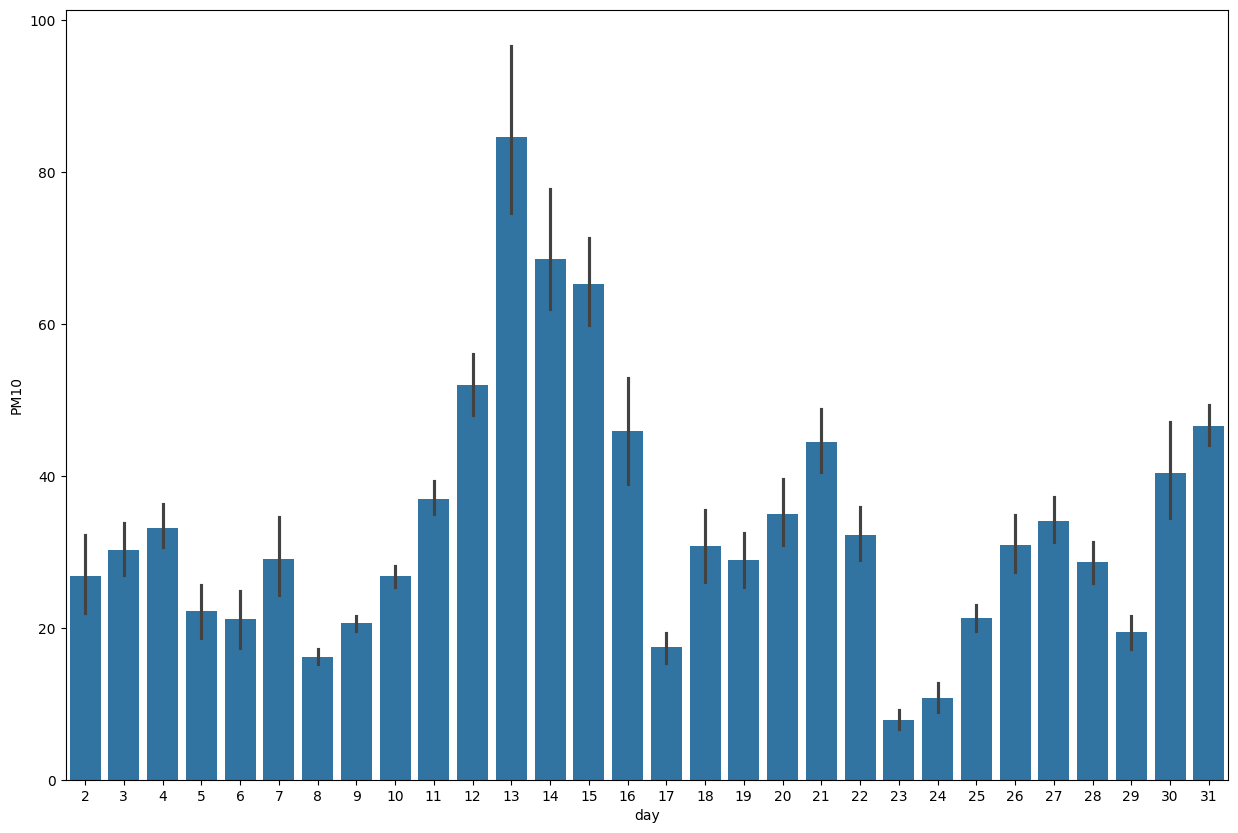

In [143]:
import matplotlib.pyplot as plt 
import seaborn as sns   
plt.figure(figsize=(15,10))
dayGraph=sns.barplot(x='day',y='PM10',data=df)
plt.xticks(rotation=0)
plt.show()

<Axes: >

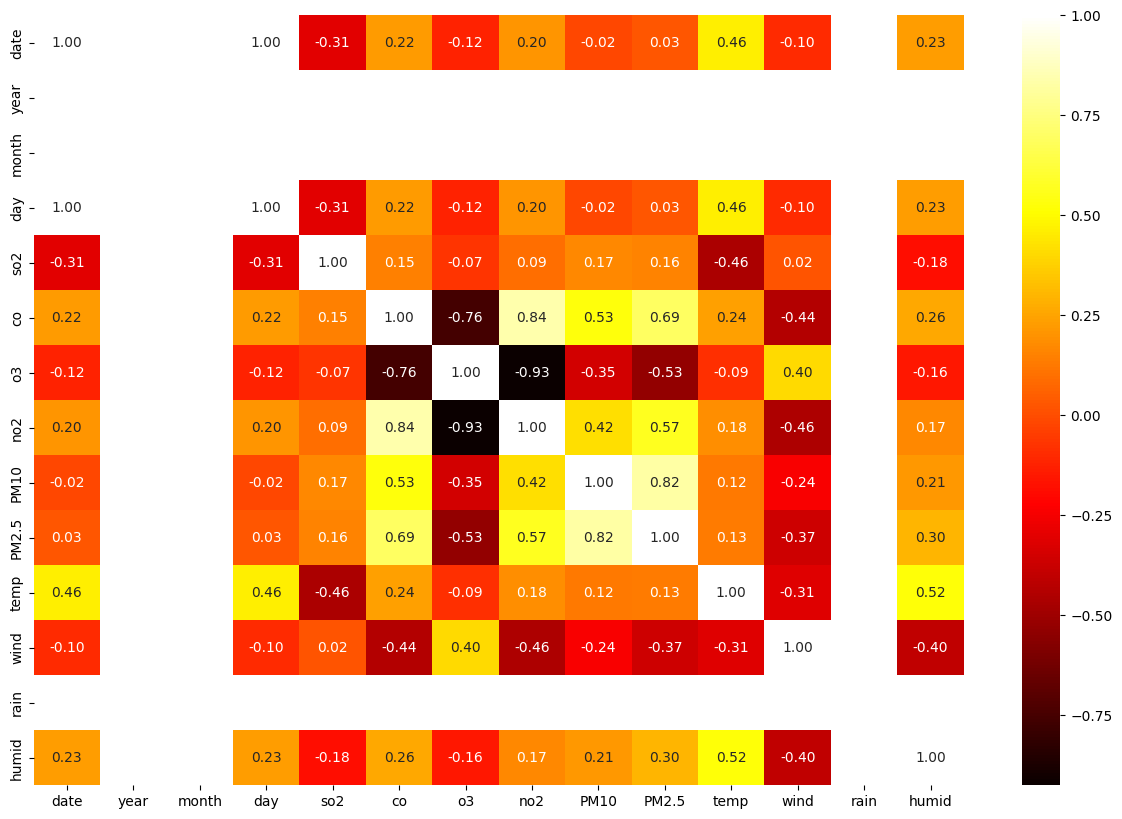

In [145]:
plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True,fmt='.2f',cmap='hot')

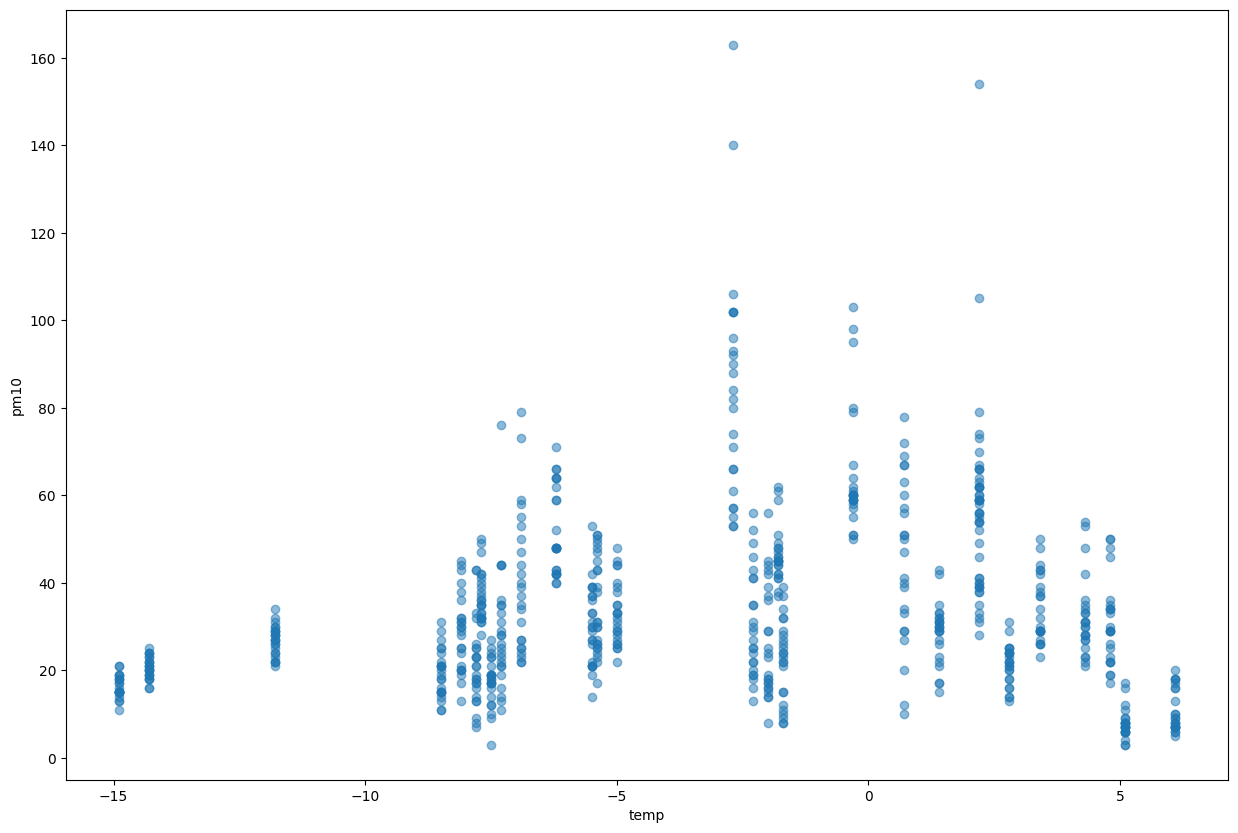

In [146]:
plt.figure(figsize=(15,10))
x=df['temp']
y=df['PM10']
plt.plot(x,y,marker='o',linestyle='none',alpha=0.5)
plt.xlabel('temp')
plt.ylabel('pm10')
plt.show()

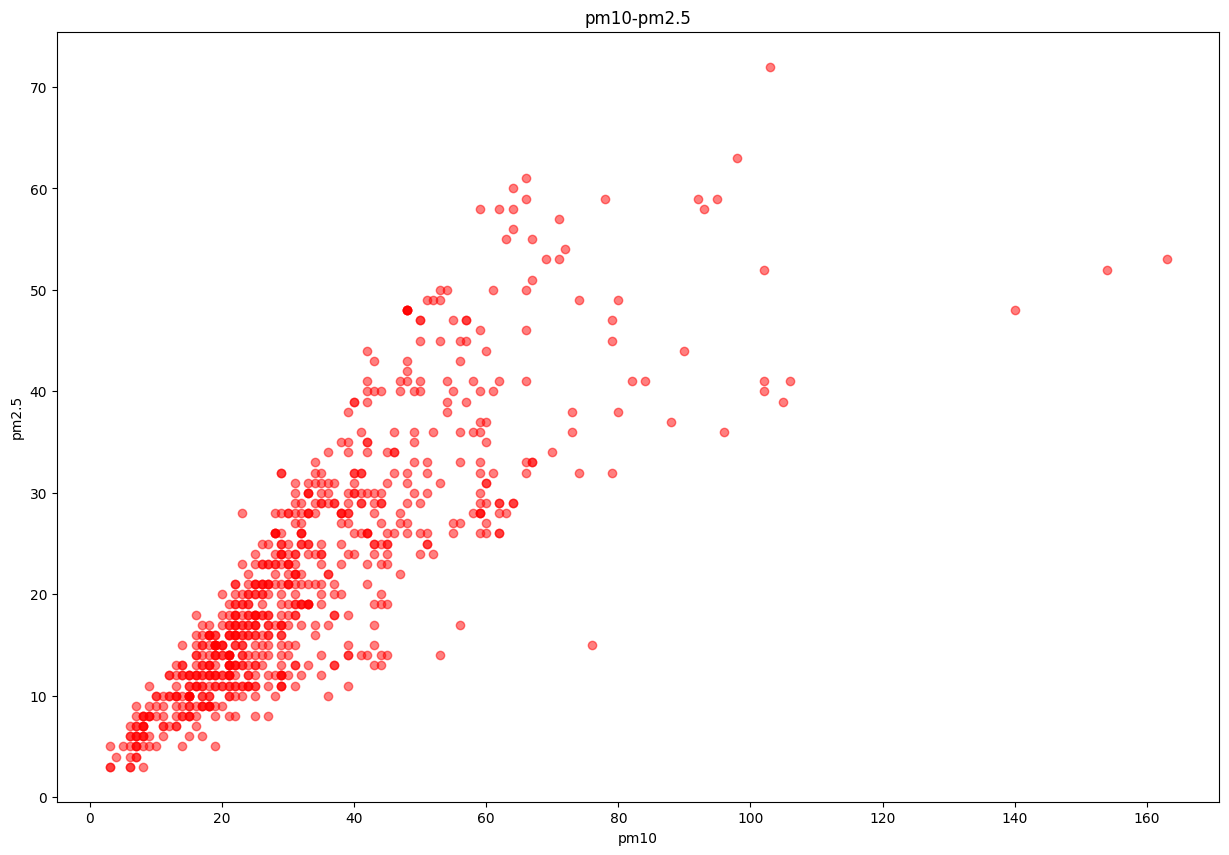

In [147]:
plt.figure(figsize=(15,10))
x=df['PM10']
y=df['PM2.5']
plt.plot(x,y,marker='o',linestyle='none',color='red',alpha=0.5)
plt.title('pm10-pm2.5')
plt.xlabel('pm10')
plt.ylabel('pm2.5')
plt.show()

In [150]:
## 교재 370 페이지의 결과와 가은 자료를 만드는 구문 

from glob import glob
import pandas as pd

fileList=glob('./행복지수/*.xlsx')
file=fileList[0]
df=pd.read_excel(file).iloc[:,1:4]
happy=pd.DataFrame({'시도': 
                          df['시도'].unique()})
#print(happy[:3])  #시도데이터를 그룹으로 제작



for file in fileList:
    print(file)
    colName=file.split('_')[1].split('.')[0] # 파일에서 건강,안전 등 이름 분리
    df=pd.read_excel(file).iloc[:,1:4]
    df.columns=['시도','군구','평균']   # 삶의 만족도.xlsx 파일이 평균필드가 없어서 이름통일 
    tmp=df['평균'].groupby(df['시도']).mean()
    happy=pd.merge(happy,tmp.rename(colName), on='시도')

happy.to_csv('happy.csv',index=False,encoding='utf-8')

#메모리 제거하고, 다시 자료 불러오는 작업을 권장
import pandas as pd 
df=pd.read_csv('happy.csv')
df

./행복지수\대한민국행복지도_건강.xlsx
./행복지수\대한민국행복지도_경제.xlsx
./행복지수\대한민국행복지도_관계및사회참여.xlsx
./행복지수\대한민국행복지도_교육.xlsx
./행복지수\대한민국행복지도_삶의만족도.xlsx
./행복지수\대한민국행복지도_안전.xlsx
./행복지수\대한민국행복지도_여가.xlsx
./행복지수\대한민국행복지도_환경.xlsx


,시도,건강,경제,관계및사회참여,교육,삶의만족도,안전,여가,환경
0,서울특별시,0.569532,0.532820,0.390656,0.399412,0.490972,0.552256,0.286732,0.470712
1,부산광역시,0.511906,0.438038,0.294719,0.504594,0.362081,0.404875,0.153587,0.448719
2,대구광역시,0.482325,0.393975,0.407486,0.585838,0.363988,0.358429,0.234925,0.552500
3,인천광역시,0.339620,0.410820,0.504920,0.502920,0.411480,0.421020,0.244590,0.515020
4,광주광역시,0.632300,0.387380,0.637800,0.689680,0.484480,0.266440,0.454980,0.607480
5,대전광역시,0.663580,0.416260,0.510820,0.840780,0.407580,0.206780,0.347960,0.582380
6,울산광역시,0.420040,0.642580,0.676440,0.763240,0.471980,0.477060,0.418420,0.393440
7,세종특별자치시,0.232000,0.511900,0.673700,0.587000,0.907700,0.157800,0.447800,0.652400
8,경기도,0.353952,0.468926,0.601532,0.668619,0.426023,0.325255,0.377561,0.557977
9,강원도,0.329506,0.386861,0.563122,0.488533,0.619506,0.548000,0.632750,0.639839


In [156]:
weather.head(25)

,date,temp,wind,rain,humid
0,2021-01-01 01:00:00,-7.2,0.6,0.01,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.01,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.01,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.01,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.01,66.4
5,2021-01-01 06:00:00,-8.9,0.5,0.01,75.1
6,2021-01-01 07:00:00,-8.2,0.4,0.01,67.4
7,2021-01-01 08:00:00,-8.4,0.4,0.01,68.8
8,2021-01-01 09:00:00,-6.9,0.5,0.01,65.4
9,2021-01-01 10:00:00,-5.1,0.9,0.01,57.4


# KNN, norm K means 검색 해보기
- https://velog.io/@gayeon/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%B4%88%EB%B3%B4%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-k-means-clustering-with-sklearn

In [2]:
# 사이킷런은 머신러닝(일반적으로 정형데이터분석)에 특화된 모듈
#하지만 딥러닝에서도 훈련,테스트 데이터 나누기, 평가지표 ,
## 결과에 대한 평가등은 사이킷런 모듈을 사용함
#사이킷런은 콘다는 scikit-learn, 파이썬은 sklearn 
# !pip install scikit-learn 

In [3]:
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

age=np.array([25,30,35,40,45,50,55,60,65,70])
purchase_amounnt=np.array([100,120,80,60,90,75,110,95,130,105])
import pandas as pd 
df=pd.DataFrame({'나이':age,
                 '금액':purchase_amounnt})
df.head()

,나이,금액
0,25,100
1,30,120
2,35,80
3,40,60
4,45,90


In [10]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)
labels=kmeans.labels_ # 각 데이터 포인트의 클러스터 할당 
centers=kmeans.cluster_centers_# 각 클러스터의 중심 좌표 
centers

c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 56., 112.],
       [ 39.,  81.]])

In [12]:
data=df.values
data

array([[ 25, 100],
       [ 30, 120],
       [ 35,  80],
       [ 40,  60],
       [ 45,  90],
       [ 50,  75],
       [ 55, 110],
       [ 60,  95],
       [ 65, 130],
       [ 70, 105]])

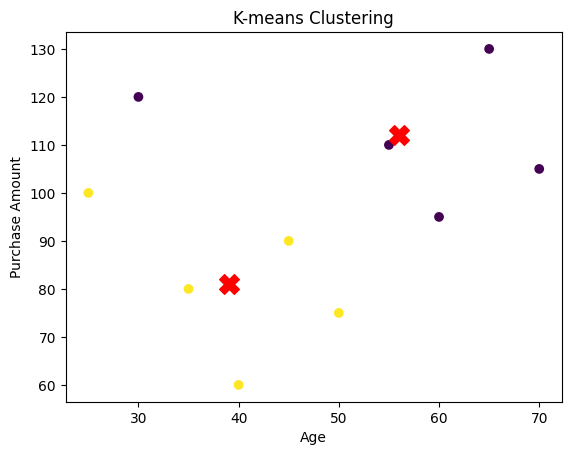

In [17]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],marker='X',s=200,c='red')
plt.title(f'K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\SeSaC\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

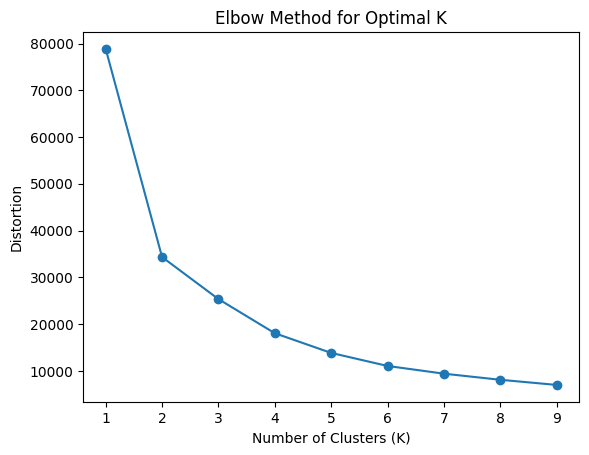

In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 가상의 고객 데이터 생성
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(18, 65, 100),
    'purchase_amount': np.random.uniform(10, 100, 100)
})

# Elbow method를 사용하여 최적의 클러스터 개수 찾기
distortions = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['age', 'purchase_amount']])
    distortions.append(kmeans.inertia_)

# Elbow 그래프 그리기
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()
